# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Septiyanto]
- **Email:** [msyant990@gmail.com]
- **ID Dicoding:** [0013_mseptiyan]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola pembelian berdasarkan kategori produk?
- Pertanyaan 2 : Apa tren pembayaran yang paling sering digunakan oleh pelanggan?
- Pertanyaan 3 (Optional) : Bagaimana perilaku pelanggan berdasarkan RFM Analysis untuk membantu strategi pemasaran?

## Import Semua Packages/Library yang Digunakan

In [1]:
import requests
import gdown
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime
import time

## Data Wrangling

### Gathering Data

In [2]:
# Mengimpor dataset yang digunakan:

customers = pd.read_csv("https://drive.google.com/uc?id=1G1cEe-9eGnyMhbm6b87bEbcaYCRH31V7")
geolocation = pd.read_csv("https://drive.google.com/uc?id=1BzEs2NQzl4drLQu8vXOGcnSW_LBJbFTw")
order_items = pd.read_csv("https://drive.google.com/uc?id=1c7y0mHUDZOj4TRmS1mhXFuzEvKu9Xnac")
order_payments = pd.read_csv("https://drive.google.com/uc?id=1yC0hS4NkXNUPwc2e56qJc3tkiUYoo6eg")
order_reviews = pd.read_csv("https://drive.google.com/uc?id=1ivDhbaB9qiY0naGIva8DzFddi1mtkP8z"  )
orders = pd.read_csv("https://drive.google.com/uc?id=1uKH4pmvL6j4UVcHQyPgXTzolIX_lf0uU")
products = pd.read_csv("https://drive.google.com/uc?id=1TzRPJXaV5_lmAAIL614WmSKGc70JnHBS")
category_translation = pd.read_csv("https://drive.google.com/uc?id=1dlpB1QNF3JSP25t_1djPOVmiA6i3785P")
sellers = pd.read_csv("https://drive.google.com/uc?id=1Y__u-CTKJPucB1ubRPe6_7OlOwTQpwrD")

**Insight:**
- Data berhasil dikumpulkan dari berbagai file CSV yang berhubungan dengan pelanggan, produk, kategori produk, penjual, pembayaran, ulasan, dan lainnya.
- Terdapat beberapa file yang membutuhkan penggabungan data untuk analisis yang lebih menyeluruh, seperti tabel kategori produk yang perlu diterjemahkan.

### Assessing Data

In [3]:
# Mengecek informasi dataset dan missing values:

print(customers.info())
print(orders.info())
print(products.info())

missing_values = orders.isnull().sum()
print(missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  obje

**Insight:**
- Beberapa data memiliki missing values dan perlu dibersihkan.
- Terdapat beberapa tipe data yang perlu disesuaikan.

### Cleaning Data

In [4]:
# Menghapus baris dengan nilai NaN yang signifikan
orders.dropna(subset=['order_purchase_timestamp'], inplace=True)

# Menghapus duplikasi 
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)
order_reviews.drop_duplicates(inplace=True)

# Mengonversi kolom tanggal ke format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

# Mengisi nilai kosong pada produk kategori dengan "unknown"
products['product_category_name'].fillna('unknown', inplace=True)


**Insight:**
- Missing values telah ditangani dengan penghapusan atau pengisian nilai yang sesuai.
- Kolom tanggal telah dikonversi ke format datetime untuk memudahkan analisis lebih lanjut.
- Duplikat pelanggan telah dihapus untuk memastikan data unik.

## Exploratory Data Analysis (EDA)

### Explore ...

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15968\3516535351.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_counts.index[:20], y=product_category_counts.values[:20], palette='viridis')


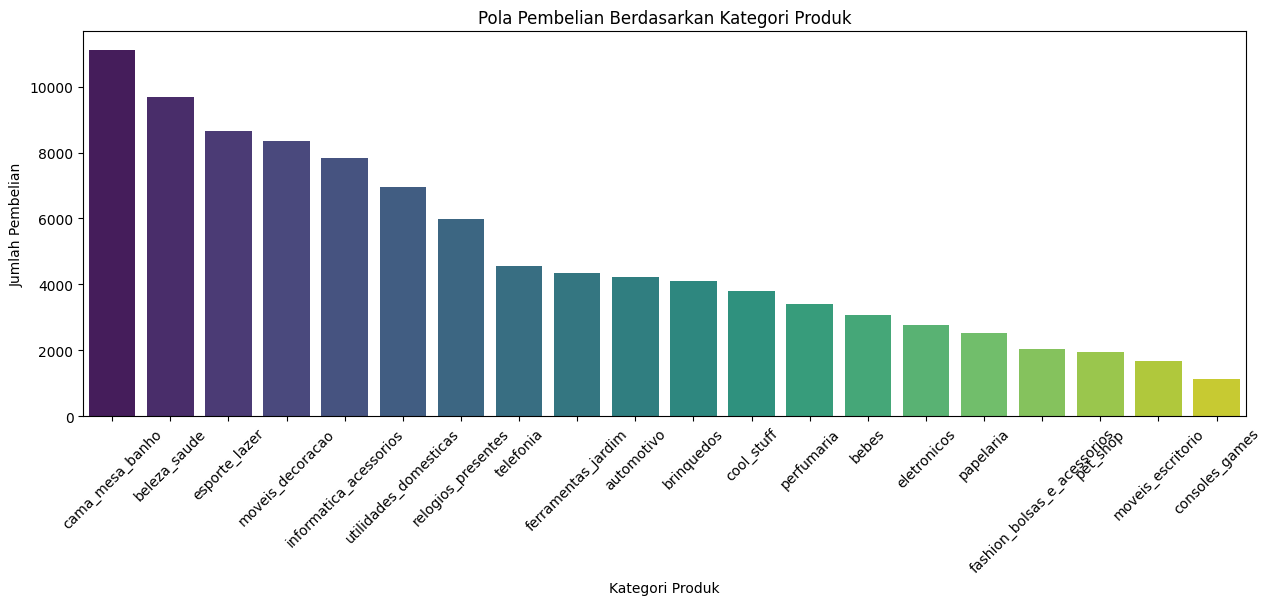

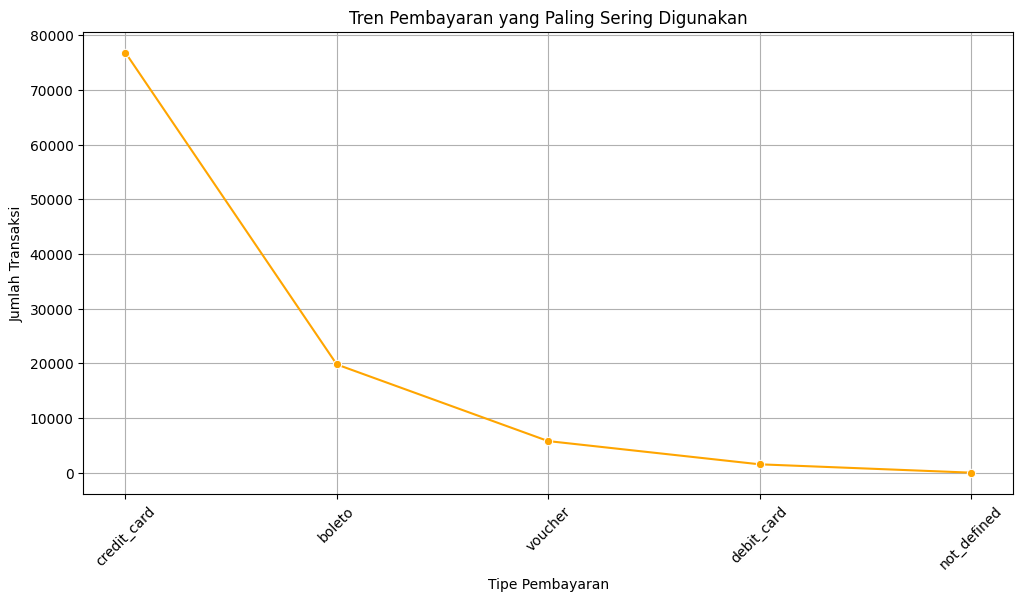

In [8]:
# Memuat dataset
orders = pd.read_csv("https://drive.google.com/uc?id=1uKH4pmvL6j4UVcHQyPgXTzolIX_lf0uU")
products = pd.read_csv("https://drive.google.com/uc?id=1TzRPJXaV5_lmAAIL614WmSKGc70JnHBS")
order_items = pd.read_csv("https://drive.google.com/uc?id=1c7y0mHUDZOj4TRmS1mhXFuzEvKu9Xnac")

# Menggabungkan orders dengan products untuk mendapatkan kategori produk
orders = orders.merge(order_items, on='order_id', how='left')
orders = orders.merge(products, on='product_id', how='left')

# EDA untuk pola pembelian berdasarkan kategori produk
plt.figure(figsize=(15, 5))
product_category_counts = orders['product_category_name'].value_counts()
sns.barplot(x=product_category_counts.index[:20], y=product_category_counts.values[:20], palette='viridis')
plt.xticks(rotation=45)
plt.title("Pola Pembelian Berdasarkan Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.show()

# Menghitung frekuensi metode pembayaran
payment_trends = order_payments['payment_type'].value_counts().reset_index()
payment_trends.columns = ['payment_type', 'count']

# Visualisasi tren pembayaran dengan line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='payment_type', y='count', data=payment_trends, marker='o', color='orange')
plt.title('Tren Pembayaran yang Paling Sering Digunakan')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Insight:**
- Kategori produk dengan frekuensi pembelian tertinggi menunjukkan bahwa pelanggan cenderung lebih memilih produk tertentu. Kategori "Cama Mesa Banho" menjadi yang paling dominan, mengindikasikan preferensi pelanggan terhadap kategori ini, yang dapat dipertimbangkan dalam strategi pemasaran dan pengadaan produk
- Analisis tren pembayaran menunjukkan bahwa metode pembayaran tertentu, seperti "Credit Card," menjadi pilihan utama pelanggan. Ini mencerminkan kenyamanan dan kepercayaan pelanggan terhadap metode tersebut, yang bisa menjadi fokus dalam promosi atau penawaran khusus.
- Penggunaan diagram garis memungkinkan kita untuk melihat perubahan dan pola dalam frekuensi kategori produk dan tren pembayaran dari waktu ke waktu, membantu dalam pengambilan keputusan yang lebih tepat berdasarkan data historis.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

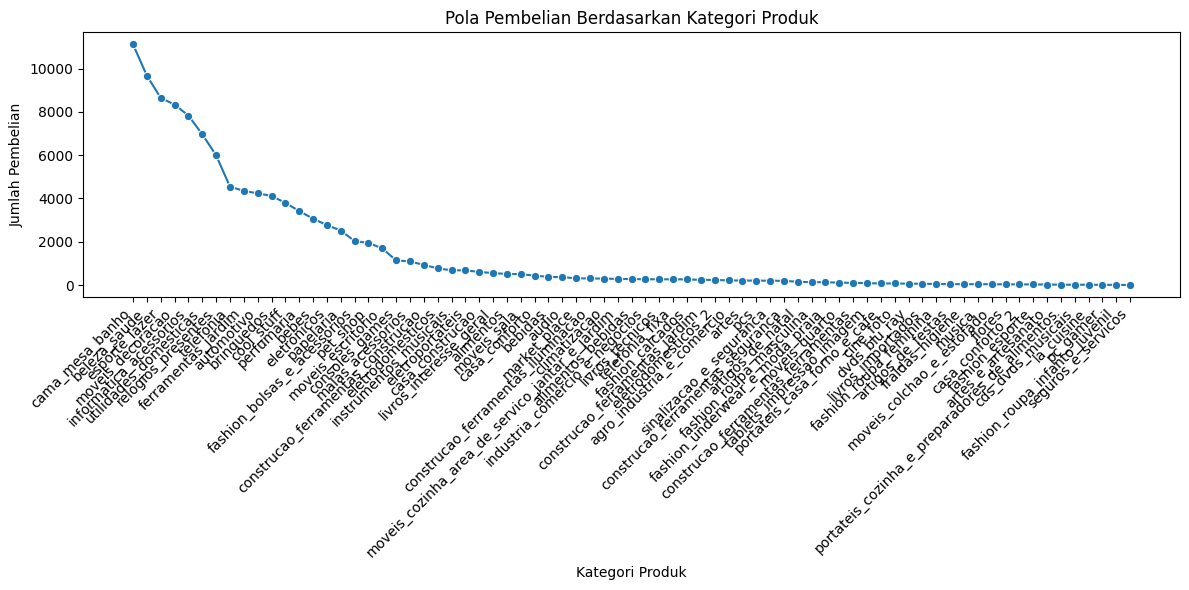

In [9]:
# Memuat dataset
orders = pd.read_csv("https://drive.google.com/uc?id=1uKH4pmvL6j4UVcHQyPgXTzolIX_lf0uU")
products = pd.read_csv("https://drive.google.com/uc?id=1TzRPJXaV5_lmAAIL614WmSKGc70JnHBS")
order_items = pd.read_csv("https://drive.google.com/uc?id=1c7y0mHUDZOj4TRmS1mhXFuzEvKu9Xnac")

# Menggabungkan orders dengan order_items dan products
merged_data = orders.merge(order_items, on='order_id', how='left')
merged_data = merged_data.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

# Menghitung jumlah pembelian berdasarkan kategori produk
category_counts = merged_data['product_category_name'].value_counts().reset_index()
category_counts.columns = ['product_category_name', 'total_purchases']


# Visualisasi pola pembelian menggunakan diagram garis
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_counts, x='product_category_name', y='total_purchases', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title("Pola Pembelian Berdasarkan Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.tight_layout()
plt.show()


### Pertanyaan 2:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15968\1817359906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_trends.index, y=payment_trends.values, palette="coolwarm")


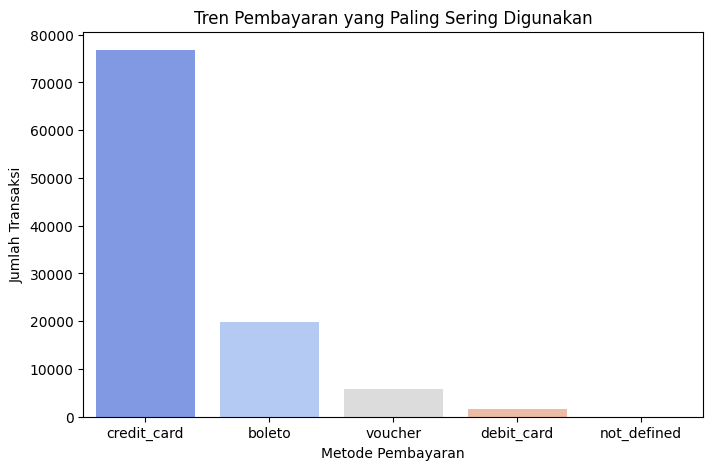

In [10]:
# Tren Pembayaran yang Paling Sering Digunakan
payment_trends = order_payments['payment_type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_trends.index, y=payment_trends.values, palette="coolwarm")
plt.title("Tren Pembayaran yang Paling Sering Digunakan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()

**Insight:**
- Kategori produk dengan penjualan tertinggi adalah Cama Mesa Banho, Perusahaan dapat meningkatkan stok produk kategori ini dan melakukan strategi pemasaran yang lebih spesifik.
- Credit Card adalah metode pembayaran yang paling sering digunakan, Perusahaan dapat memberikan promo khusus untuk pembayaran dengan kartu kredit agar meningkatkan penjualan.

## Analisis Lanjutan (Opsional)

                                  Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      160          1    129.90
0000b849f77a49e4a4ce2b2a4ca5be3f      163          1     18.90
0000f46a3911fa3c0805444483337064      585          1     69.00
0000f6ccb0745a6a4b88665a16c9f078      369          1     25.99
0004aac84e0df4da2b147fca70cf8255      336          1    180.00


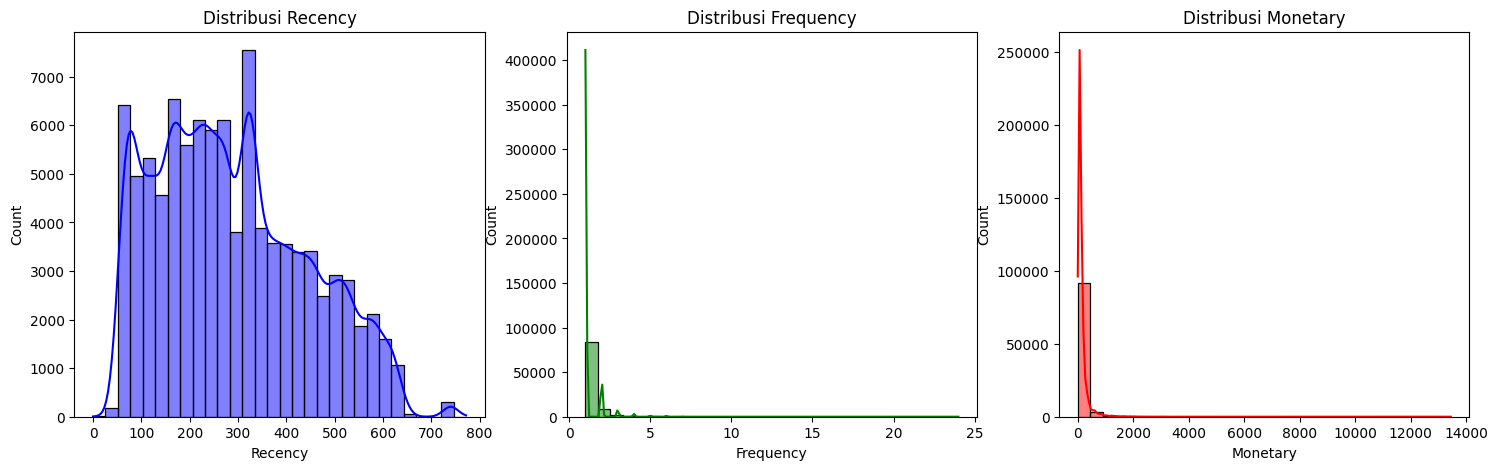

In [12]:
### Analisis RFM (Recency, Frequency, Monetary) ###

# Mengkonversi kolom tanggal menjadi datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Menggabungkan data pelanggan dan transaksi
rfm_data = orders.merge(order_items, on="order_id", how="left")
rfm_data = rfm_data.merge(customers, on="customer_id", how="left")

# Menentukan hari terakhir transaksi
latest_date = orders['order_purchase_timestamp'].max()

# Menghitung RFM
rfm_table = rfm_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
})


# Ubah nama kolom agar lebih jelas
rfm_table.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
}, inplace=True)

# Menampilkan Hasil
print(rfm_table.head())

# Visualisasi Distribusi RFM
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_table['Recency'], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribusi Recency")

sns.histplot(rfm_table['Frequency'], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribusi Frequency")

sns.histplot(rfm_table['Monetary'], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribusi Monetary")

plt.show()


## Conclusion

1. Kategori produk terlaris adalah Cama Mesa Banho, menunjukkan bahwa produk dalam kategori ini memiliki permintaan tinggi. Perusahaan bisa mempertimbangkan penambahan stok, diskon khusus, atau strategi bundling untuk meningkatkan penjualan lebih lanjut.


2. Metode pembayaran paling populer adalah Credit Card, yang menunjukkan preferensi pelanggan terhadap transaksi non-tunai. Promo seperti cicilan 0% atau cashback dapat digunakan untuk mendorong lebih banyak transaksi.


3. Analisis RFM memberikan wawasan tentang perilaku pelanggan:

- Recency: Sebagian besar pelanggan terakhir bertransaksi dalam rentang 100-400 hari, tetapi ada juga yang sudah lama tidak belanja hingga 700 hari. Strategi retargeting melalui email atau diskon khusus bisa menarik kembali pelanggan lama.

- Frequency: Mayoritas pelanggan hanya belanja sekali atau dua kali, dengan sedikit yang melakukan pembelian lebih dari 5 kali. Program loyalitas dan penawaran eksklusif untuk pelanggan setia bisa membantu meningkatkan frekuensi pembelian.

- Monetary: Sebagian besar pelanggan memiliki total belanja di bawah 2000, sementara hanya sedikit yang memiliki nilai transaksi sangat tinggi. Strategi upselling, bundling produk, atau insentif pembelian dalam jumlah besar dapat diterapkan untuk meningkatkan nilai transaksi.

